# Predict the critical temperature based on the features extracted using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')


In [3]:
dataset.head()
#

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

<AxesSubplot:>

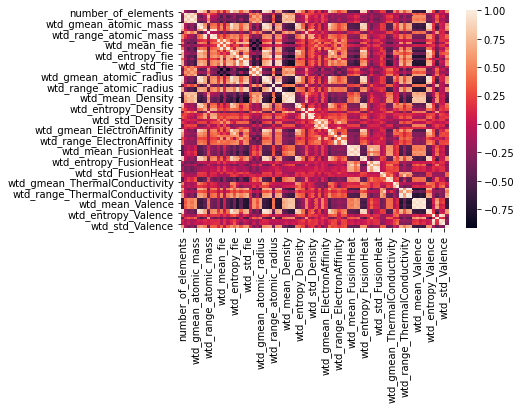

In [6]:
sns.heatmap(dataset.corr())

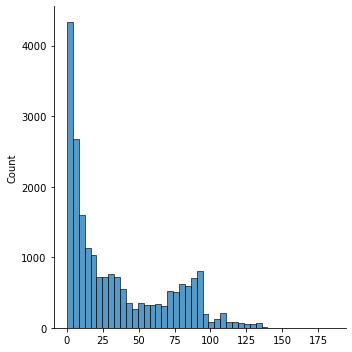

In [7]:
 sns.displot(dataset.critical_temp.values)

### Splitting the dataset into the Training set and Test set

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os

sc =  MinMaxScaler()
kfold = KFold(n_splits=3, shuffle=True, random_state=7)
cvscores = []
fold_no = 0

for train, test in kfold.split(X, y):
    X[train] = sc.fit_transform(X[train])
    X[test] = sc.transform(X[test])
    
    #Building the ANN
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=1))
    
    #Compiling the ANN
    ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    # Save the best performing Keras model across all the folds in K-fold cross validation:
    # Define callbacks
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
    #mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    # Define callbacks
    checkpoint_path = f'./{fold_no}'
    os.mkdir(checkpoint_path)
    mc =ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
        
    #Training the ANN model on the Training set
    history = ann.fit(X[train], y[train], validation_data = (X[test],y[test]), batch_size = 128, epochs = 400, verbose=1, callbacks=[es, mc])

    # evaluate the model
    test_loss = ann.evaluate(X[test], y[test], verbose=0)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold: {fold_no} ...')
    print("%s: %.2f%%" % (ann.metrics_names[0], test_loss))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(test_loss), np.std(test_loss)))
    cvscores.append(test_loss)
    # Increase fold number
    fold_no = fold_no + 1
print("mean loss:%.2f%% -standard deviation:(+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Using TensorFlow backend.


Train on 14175 samples, validate on 7088 samples
Epoch 1/400
13696/14175 [===========================>..] - ETA: 0s - loss: 769.3620WARNING:tensorflow:From C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./0\assets
14175/14175 [==============================] - 4s 269us/sample - loss: 762.0221 - val_loss: 460.1117
Epoch 2/400
14175/14175 [==============================] - 4s 264us/sample - loss: 431.6517 - val_loss: 289.8113
Epoch 3/400
14175/14175 [==============================] - 3s 220us/sample - loss: 391.3352 - val_loss: 285.6718
Epoch 4/400
14175/14175 [==============================] - 3s 221us/sample - loss: 378.9897 - val_loss: 

Epoch 55/400
14175/14175 [==============================] - 1s 87us/sample - loss: 314.5191 - val_loss: 249.2685
Epoch 56/400
14175/14175 [==============================] - 1s 90us/sample - loss: 303.8992 - val_loss: 223.7126
Epoch 57/400
14175/14175 [==============================] - 1s 90us/sample - loss: 311.5587 - val_loss: 235.4252
Epoch 58/400
14175/14175 [==============================] - 1s 89us/sample - loss: 306.3781 - val_loss: 250.1030
Epoch 59/400
14175/14175 [==============================] - 1s 95us/sample - loss: 305.4738 - val_loss: 239.2693
Epoch 60/400
14175/14175 [==============================] - 3s 213us/sample - loss: 300.2591 - val_loss: 221.6563
Epoch 61/400
14175/14175 [==============================] - 2s 124us/sample - loss: 298.3235 - val_loss: 228.7891
Epoch 62/400
14175/14175 [==============================] - 2s 114us/sample - loss: 296.0316 - val_loss: 241.6788
Epoch 63/400
14175/14175 [==============================] - 2s 107us/sample - loss: 295.0099 

14175/14175 [==============================] - 2s 120us/sample - loss: 327.0215 - val_loss: 254.6369
Epoch 25/400
14175/14175 [==============================] - 2s 106us/sample - loss: 325.2029 - val_loss: 263.1431
Epoch 26/400
14175/14175 [==============================] - 2s 116us/sample - loss: 320.1782 - val_loss: 252.7158
Epoch 27/400
14175/14175 [==============================] - 2s 116us/sample - loss: 320.3466 - val_loss: 254.3028
Epoch 28/400
14175/14175 [==============================] - 2s 110us/sample - loss: 316.2538 - val_loss: 243.6193
Epoch 29/400
14175/14175 [==============================] - 2s 114us/sample - loss: 319.7007 - val_loss: 260.2885
Epoch 30/400
14175/14175 [==============================] - 2s 112us/sample - loss: 328.1468 - val_loss: 253.6229
Epoch 31/400
14175/14175 [==============================] - 2s 108us/sample - loss: 322.1119 - val_loss: 252.2315
Epoch 32/400
14175/14175 [==============================] - 2s 110us/sample - loss: 327.1966 - val_lo

Epoch 89/400
14175/14175 [==============================] - 1s 86us/sample - loss: 282.3782 - val_loss: 241.9807
Epoch 90/400
14175/14175 [==============================] - 1s 88us/sample - loss: 281.1765 - val_loss: 230.4577
Epoch 91/400
14175/14175 [==============================] - 1s 94us/sample - loss: 291.7183 - val_loss: 224.0718
Epoch 92/400
14175/14175 [==============================] - 1s 96us/sample - loss: 295.1730 - val_loss: 226.0043
Epoch 93/400
14175/14175 [==============================] - 1s 88us/sample - loss: 285.8849 - val_loss: 230.6570
Epoch 94/400
14175/14175 [==============================] - 3s 186us/sample - loss: 289.1928 - val_loss: 218.8787
Epoch 95/400
14175/14175 [==============================] - 1s 99us/sample - loss: 286.7042 - val_loss: 218.9027
Epoch 96/400
14175/14175 [==============================] - 1s 95us/sample - loss: 290.8513 - val_loss: 220.6511
Epoch 97/400
14175/14175 [==============================] - 1s 86us/sample - loss: 288.2972 - v

Epoch 158/400
14175/14175 [==============================] - 1s 93us/sample - loss: 265.5613 - val_loss: 263.1963
Epoch 00158: early stopping
------------------------------------------------------------------------
Training for fold 1 ...
loss: 263.20%
263.20% (+/- 0.00%)
Train on 14176 samples, validate on 7087 samples
Epoch 1/400
14176/14176 [==============================] - 3s 242us/sample - loss: 766.9651 - val_loss: 391.0075
Epoch 2/400
14176/14176 [==============================] - 1s 100us/sample - loss: 436.3801 - val_loss: 399.2289
Epoch 3/400
14176/14176 [==============================] - 3s 198us/sample - loss: 386.9859 - val_loss: 320.1262
Epoch 4/400
14176/14176 [==============================] - 3s 209us/sample - loss: 364.8641 - val_loss: 312.8498
Epoch 5/400
14176/14176 [==============================] - 3s 211us/sample - loss: 356.9831 - val_loss: 293.6441
Epoch 6/400
14176/14176 [==============================] - 3s 210us/sample - loss: 356.1402 - val_loss: 279.4054


Epoch 55/400
14176/14176 [==============================] - 1s 93us/sample - loss: 292.2825 - val_loss: 256.2312
Epoch 56/400
14176/14176 [==============================] - 1s 98us/sample - loss: 294.8800 - val_loss: 242.2368
Epoch 57/400
14176/14176 [==============================] - 1s 101us/sample - loss: 294.7745 - val_loss: 243.0644
Epoch 58/400
14176/14176 [==============================] - 1s 90us/sample - loss: 300.7628 - val_loss: 259.8470
Epoch 59/400
14176/14176 [==============================] - 1s 91us/sample - loss: 297.0893 - val_loss: 254.0864
Epoch 60/400
14176/14176 [==============================] - 1s 86us/sample - loss: 291.4924 - val_loss: 276.9970
Epoch 61/400
14176/14176 [==============================] - 1s 86us/sample - loss: 287.6068 - val_loss: 272.1118
Epoch 62/400
14176/14176 [==============================] - 1s 85us/sample - loss: 291.1263 - val_loss: 248.8643
Epoch 63/400
14176/14176 [==============================] - 1s 86us/sample - loss: 293.4396 - v

14176/14176 [==============================] - 1s 94us/sample - loss: 266.3420 - val_loss: 256.8216
Epoch 124/400
14176/14176 [==============================] - 1s 100us/sample - loss: 270.5354 - val_loss: 233.0787
Epoch 125/400
14176/14176 [==============================] - 1s 92us/sample - loss: 271.5603 - val_loss: 246.3588
Epoch 126/400
14176/14176 [==============================] - 2s 110us/sample - loss: 272.1212 - val_loss: 265.6936
Epoch 127/400
14176/14176 [==============================] - 3s 239us/sample - loss: 269.2746 - val_loss: 232.1693
Epoch 128/400
14176/14176 [==============================] - 2s 108us/sample - loss: 264.8814 - val_loss: 262.6324
Epoch 129/400
14176/14176 [==============================] - 3s 218us/sample - loss: 274.0755 - val_loss: 231.4701
Epoch 130/400
14176/14176 [==============================] - 2s 118us/sample - loss: 266.0364 - val_loss: 264.3625
Epoch 131/400
14176/14176 [==============================] - 1s 101us/sample - loss: 271.2724 - 

14176/14176 [==============================] - 2s 107us/sample - loss: 251.8245 - val_loss: 233.9278
Epoch 188/400
14176/14176 [==============================] - 2s 107us/sample - loss: 249.3536 - val_loss: 224.3895
Epoch 189/400
14176/14176 [==============================] - 2s 138us/sample - loss: 257.7687 - val_loss: 251.7466
Epoch 190/400
14176/14176 [==============================] - 2s 109us/sample - loss: 265.1159 - val_loss: 245.1748
Epoch 00190: early stopping
------------------------------------------------------------------------
Training for fold 2 ...
loss: 245.17%
245.17% (+/- 0.00%)
mean loss:248.83% -standard deviation:(+/- 10.56%)


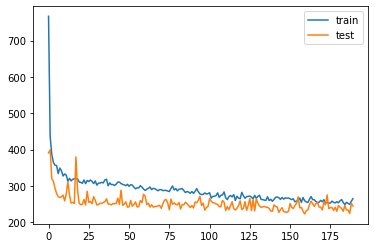

In [10]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Predicting the results of the Test set

In [11]:
y_pred = ann.predict(X[test])
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y[test].reshape(len(y[test]),1)),1))

[[33.28 11.  ]
 [23.31 33.  ]
 [24.34 33.  ]
 ...
 [ 4.78  3.43]
 [ 5.74  1.98]
 [12.51 12.8 ]]


C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

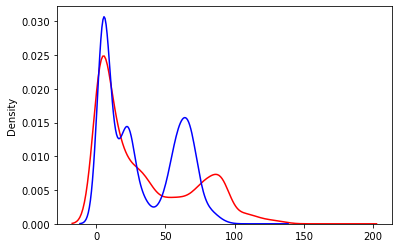

In [12]:
ax1 = sns.distplot(y[test], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

Text(0, 0.5, 'Predicted Critical Temperature (K)')

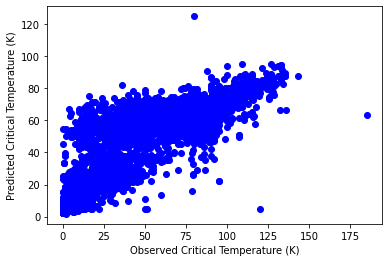

In [13]:
plt.scatter(y[test], y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [14]:
loss_train= np.sqrt(history.history['loss'])
np.mean(loss_train)

16.932689874757823

In [15]:
loss_test= np.sqrt(history.history['val_loss'])
np.mean(loss_test)

15.873816629418895